In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.models
import torchvision.transforms

import sklearn.datasets
import sklearn.preprocessing
import sklearn.model_selection

In [2]:
numeros = sklearn.datasets.load_digits()
imagenes = numeros['images']  # Hay 1797 digitos representados en imagenes 8x8
n_imagenes = len(imagenes)
X = imagenes.reshape((n_imagenes, -1)) # para volver a tener los datos como imagen basta hacer data.reshape((n_imagenes, 8, 8))
Y = numeros['target']

scaler = sklearn.preprocessing.StandardScaler()
X_train = scaler.fit_transform(X).reshape(n_imagenes,8,8)
Y_train = Y

x_train = torch.autograd.Variable(torch.Tensor(X_train).float())
y_train = torch.autograd.Variable(torch.Tensor(Y_train).long())

x_train = x_train.unsqueeze(1)

In [3]:
# Verifico dimensiones de las capas
print(x_train.size())

n = torch.nn.Conv2d(1, 5,kernel_size=2,stride=2) # in-channels, out-channels, kernel, stride
new_tensor = n(x_train)
print(new_tensor.size())

n = torch.nn.Conv2d(5,7,kernel_size=2,stride=1)
new_tensor = n(new_tensor)
print(new_tensor.size())

n = torch.nn.Conv2d(7,3,kernel_size=1,stride=2)
new_tensor = n(new_tensor)
print(new_tensor.size())

n = torch.nn.Conv2d(3,4,kernel_size=1,stride=1)
new_tensor = n(new_tensor)
print(new_tensor.size())

torch.Size([1797, 1, 8, 8])
torch.Size([1797, 5, 4, 4])
torch.Size([1797, 7, 3, 3])
torch.Size([1797, 3, 2, 2])
torch.Size([1797, 4, 2, 2])


In [4]:
# define el autoencoder
class Autoencoder(torch.nn.Module):
    def __init__(self,cs,ks,ss):
        super(Autoencoder,self).__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Conv2d(1,cs[0],kernel_size=ks[0], stride=ss[0]),
            torch.nn.Conv2d(cs[0],cs[1],kernel_size=ks[1], stride=ss[1]),
            torch.nn.Conv2d(cs[1],cs[2],kernel_size=ks[2], stride=ss[2])
        )
        self.decoder = torch.nn.Sequential(             
            torch.nn.ConvTranspose2d(cs[2],cs[1],kernel_size=ks[2], stride=ss[2]),
            torch.nn.ConvTranspose2d(cs[1],cs[0],kernel_size=ks[1], stride=ss[1]),
            torch.nn.ConvTranspose2d(cs[0],1,kernel_size=ks[0], stride=ss[0]),
        )
    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
    def num_parametros(self):
        n_p = 0
        for m in self.parameters():
            n_p += m.flatten().size()[0]
        return n_p
    def espacio_latente(self):
        return self.nl

In [5]:
num_epochs = 100

N_L = []
N_C = []
losses = []

def intento(cs,ks,ss):
    
    model = Autoencoder(cs,ks,ss)
    N_L.append(model.encoder(x_train).size()[3])
    N_C.append(model.num_parametros())
    distance = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.02, weight_decay=1E-3)
    
    for epoch in range(num_epochs):
        output = model(x_train)
        loss = distance(output, x_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    losses.append(loss.item())

In [6]:
intento([1,1,1],[1,1,1],[1,1,1])
intento([10,7,3],[1,3,1],[1,1,1])
intento([5,7,3],[1,3,1],[1,1,1])

In [7]:
# define el autoencoder
class Autoencoder(torch.nn.Module):
    def __init__(self,cs,ks,ss):
        super(Autoencoder,self).__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Conv2d(1,cs[0],kernel_size=ks[0], stride=ss[0]),
            torch.nn.Conv2d(cs[0],cs[1],kernel_size=ks[1], stride=ss[1]),
            torch.nn.Conv2d(cs[1],cs[2],kernel_size=ks[2], stride=ss[2]),
            torch.nn.Conv2d(cs[2],cs[3],kernel_size=ks[3], stride=ss[3])
        )
        self.decoder = torch.nn.Sequential(             
            torch.nn.ConvTranspose2d(cs[3],cs[2],kernel_size=ks[3], stride=ss[3]),
            torch.nn.ConvTranspose2d(cs[2],cs[1],kernel_size=ks[2], stride=ss[2]),
            torch.nn.ConvTranspose2d(cs[1],cs[0],kernel_size=ks[1], stride=ss[1]),
            torch.nn.ConvTranspose2d(cs[0],1,kernel_size=ks[0], stride=ss[0]),
        )
    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
    def num_parametros(self):
        n_p = 0
        for m in self.parameters():
            n_p += m.flatten().size()[0]
        return n_p
    def espacio_latente(self):
        return self.nl

In [8]:
intento([10,7,3,4],[1,1,1,1],[1,1,1,1])
intento([10,7,3,4],[3,1,1,1],[1,1,1,1])
intento([10,7,3,4],[2,2,1,1],[1,1,1,1])

In [9]:
# define el autoencoder
class Autoencoder(torch.nn.Module):
    def __init__(self,cs,ks,ss):
        super(Autoencoder,self).__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Conv2d(1,cs[0],kernel_size=ks[0], stride=ss[0]),
            torch.nn.Conv2d(cs[0],cs[1],kernel_size=ks[1], stride=ss[1]),
        )
        self.decoder = torch.nn.Sequential(             
            torch.nn.ConvTranspose2d(cs[1],cs[0],kernel_size=ks[1], stride=ss[1]),
            torch.nn.ConvTranspose2d(cs[0],1,kernel_size=ks[0], stride=ss[0]),
        )
    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
    def num_parametros(self):
        n_p = 0
        for m in self.parameters():
            n_p += m.flatten().size()[0]
        return n_p
    def espacio_latente(self):
        return self.nl

In [10]:
intento([2,4],[2,2],[1,1])
intento([2,4],[2,3],[1,1])
intento([10,5],[3,2],[1,2])
intento([3,6],[4,3],[2,1])

Text(0, 0.5, 'Dimensionalidad espacio latente')

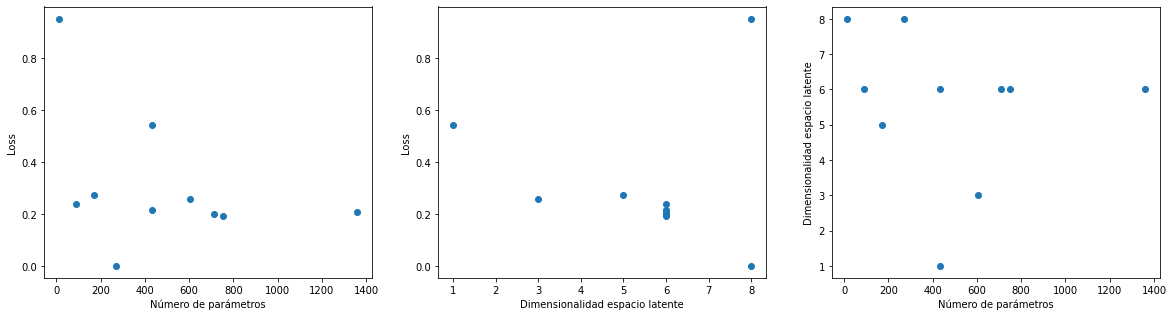

In [15]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.scatter(N_C,losses)
plt.xlabel('Número de parámetros')
plt.ylabel('Loss')

plt.subplot(1,3,2)
plt.scatter(N_L,losses)
plt.xlabel('Dimensionalidad espacio latente')
plt.ylabel('Loss')

plt.subplot(1,3,3)
plt.scatter(N_C,N_L)
plt.xlabel('Número de parámetros')
plt.ylabel('Dimensionalidad espacio latente')